In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("libraries loaded\n")

libraries loaded



In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
    
# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

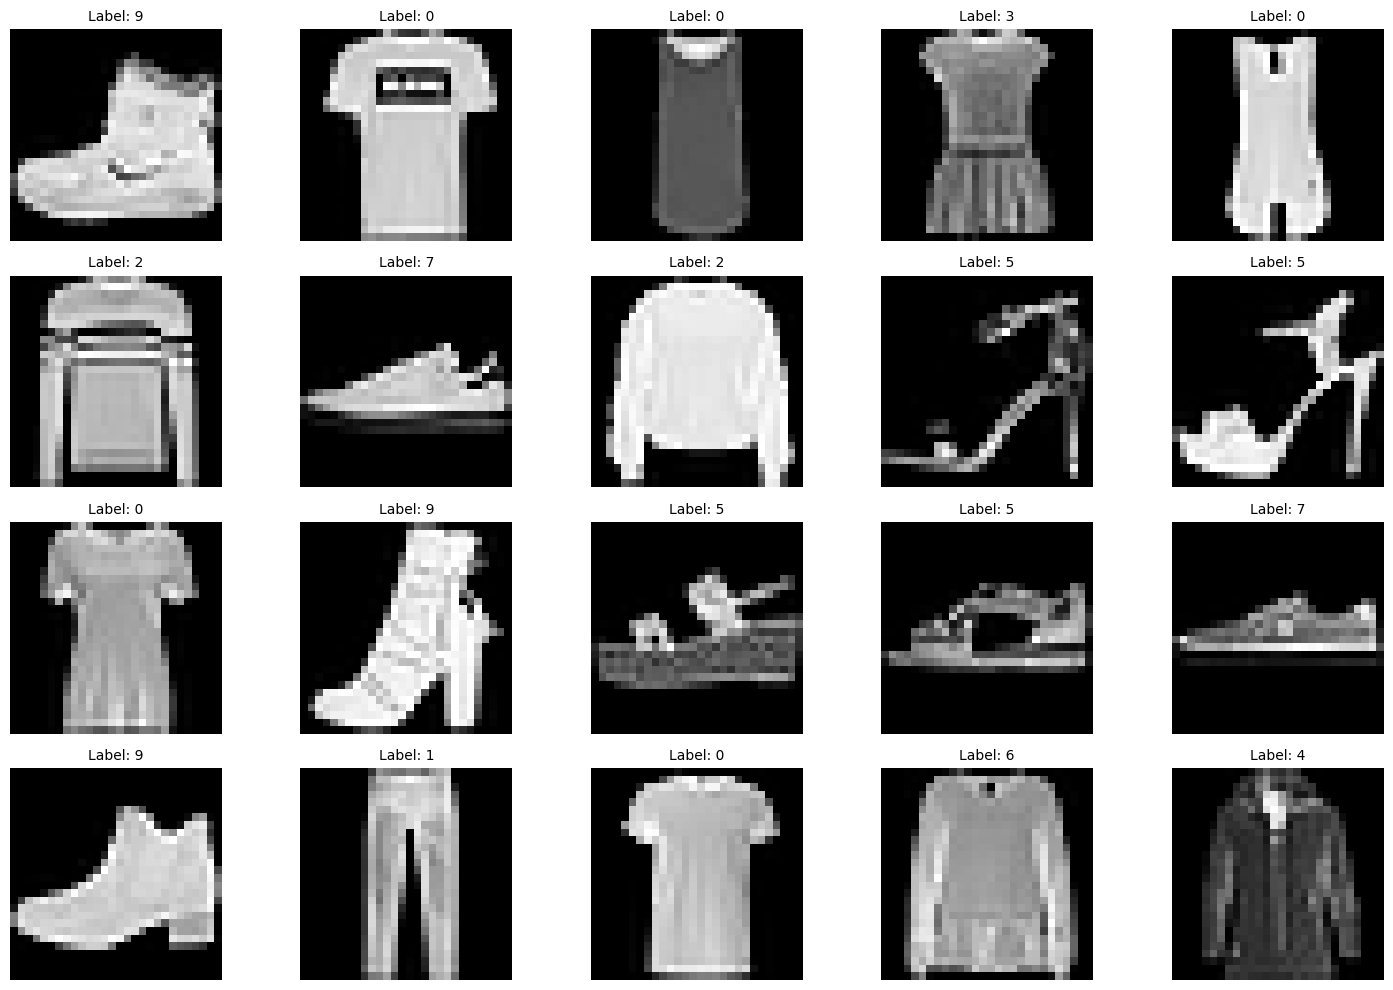

In [11]:
plt.figure(figsize=(15, 10))  # Adjust the figure size for better visualization
for i in range(20):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [12]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
print('model created')

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=64,
    verbose=1
)

/home/vaibhav-dhanani/Documents/SEM6/ML/model_implementation/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model created
Epoch 1/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6073 - loss: 1.0885 - val_accuracy: 0.8218 - val_loss: 0.4698
Epoch 2/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8008 - loss: 0.5410 - val_accuracy: 0.8485 - val_loss: 0.4152
Epoch 3/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8369 - loss: 0.4647 - val_accuracy: 0.8660 - val_loss: 0.3625
Epoch 4/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8554 - loss: 0.4100 - val_accuracy: 0.8745 - val_loss: 0.3423
Epoch 5/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8714 - loss: 0.3659 - val_accuracy: 0.8875 - val_loss: 0.3056
Epoch 6/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8803 - loss: 0.3483 - val_accuracy: 0.8858 - val_loss: 0.3005
Epoch 7/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.8847 - loss: 0.3249 - val_accuracy: 0.8902 - val_loss: 0.3076
Epoch 8/40
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8930 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8997 - loss: 0.5648

Test accuracy = 0.9038


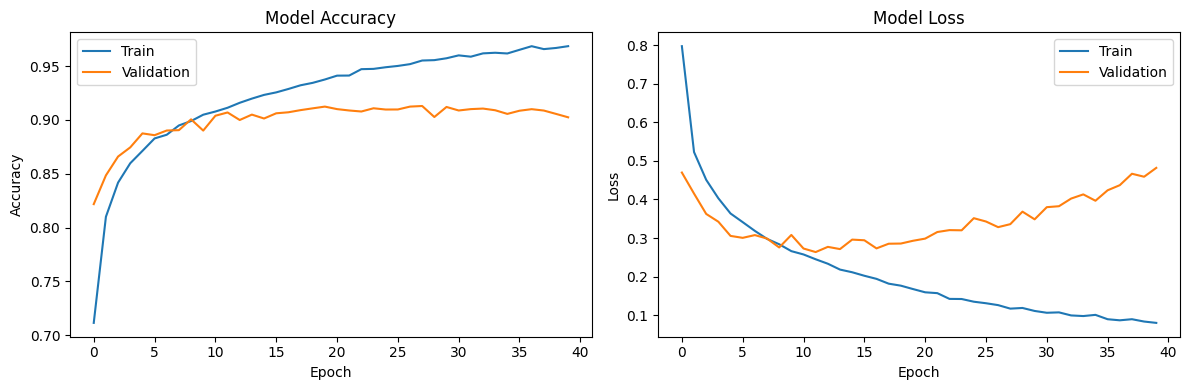

In [13]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"\nTest accuracy = {test_accuracy:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))    
# Plot accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])

# Plot loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Get predictions on test set
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.80      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.83      0.88      0.86      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.69      0.76      0.72      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



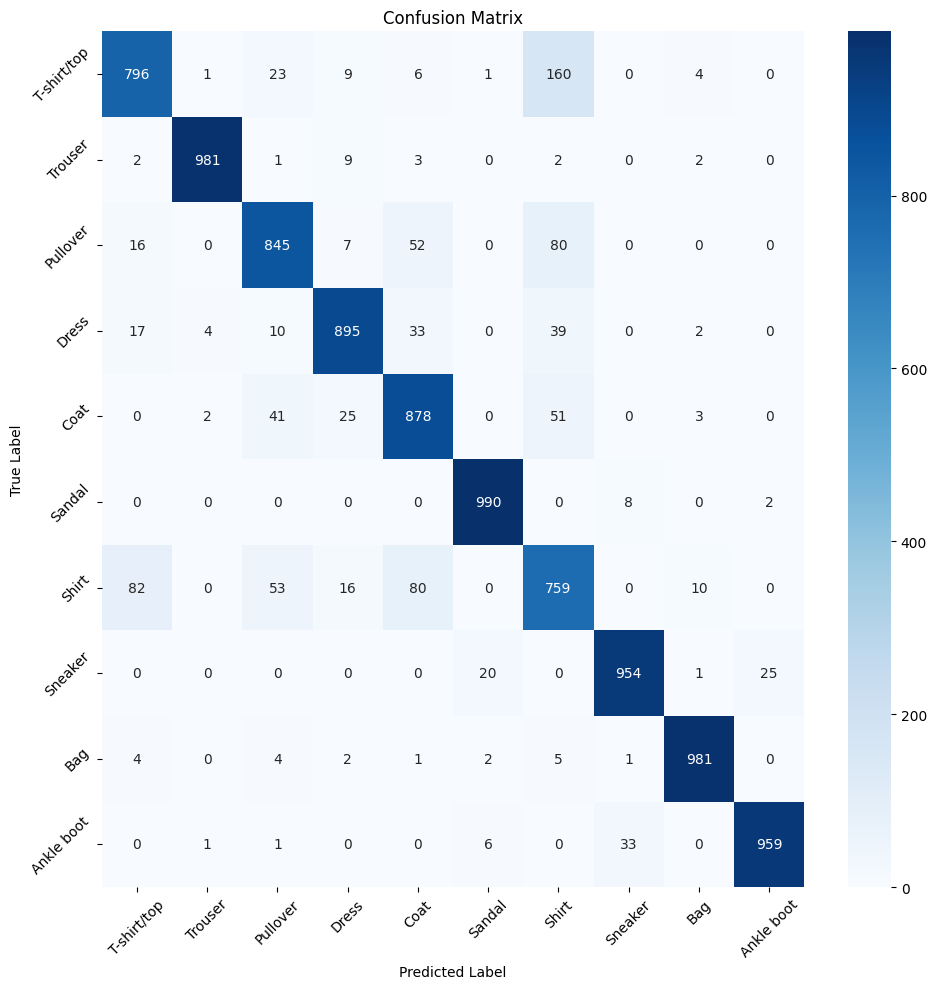

In [19]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


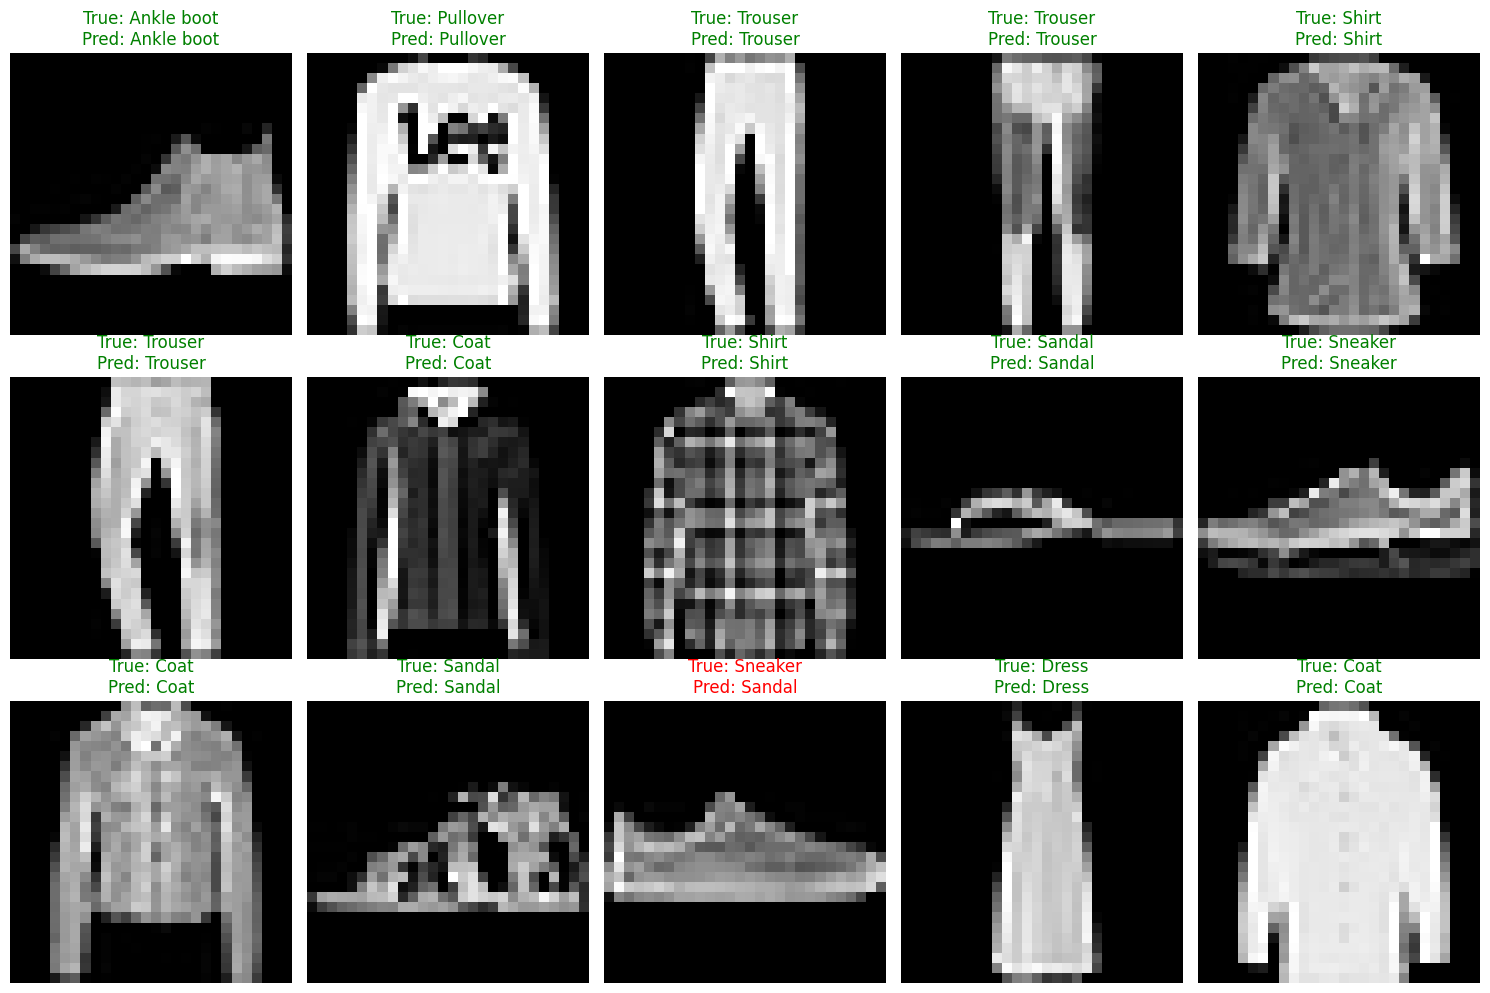

In [20]:
# Plot example predictions
plt.figure(figsize=(15, 10))
num_examples = 15
for i in range(num_examples):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    true_label = class_names[y_test[i]]
    pred_label = class_names[np.argmax(predictions[i])]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
# Analyze confidence levels
probabilities = np.max(predictions, axis=1)
wrong_predictions = y_pred != y_test

# Find the indices of the worst predictions (wrong predictions with high confidence)
worst_predictions = np.argsort(probabilities * wrong_predictions)[-10:]


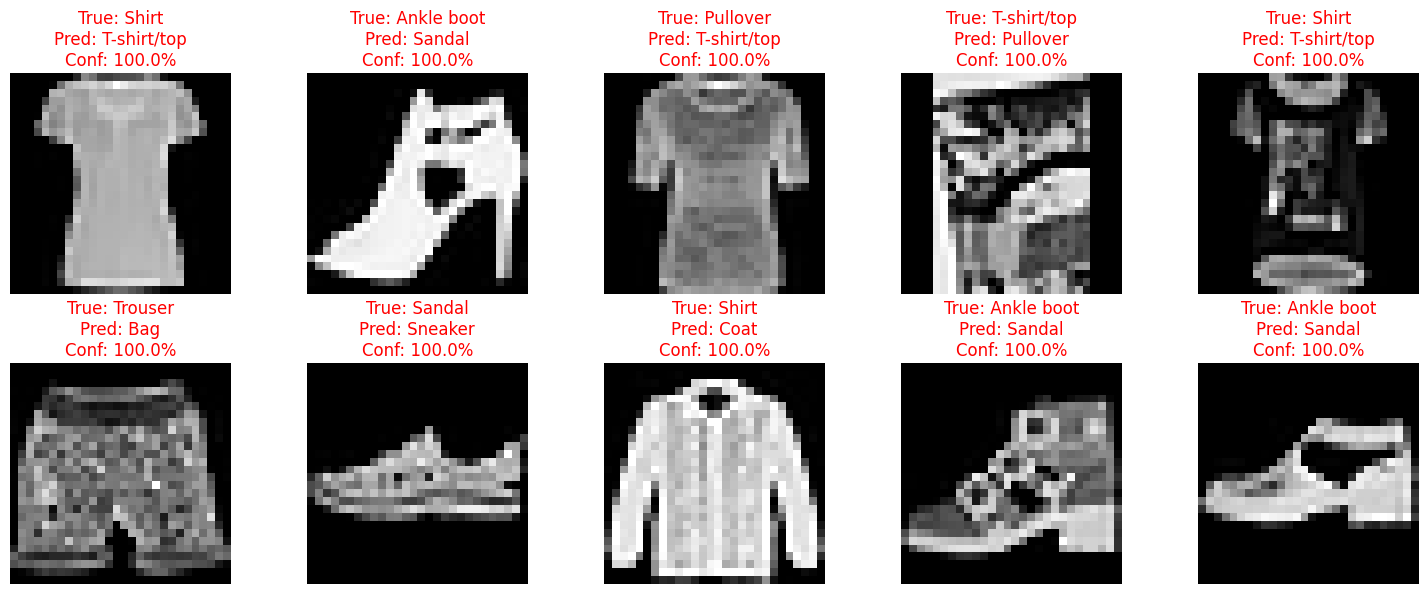

In [22]:
# Display worst predictions
plt.figure(figsize=(15, 6))
for i, idx in enumerate(worst_predictions):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]
    conf = probabilities[idx] * 100
    plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {conf:.1f}%', color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()


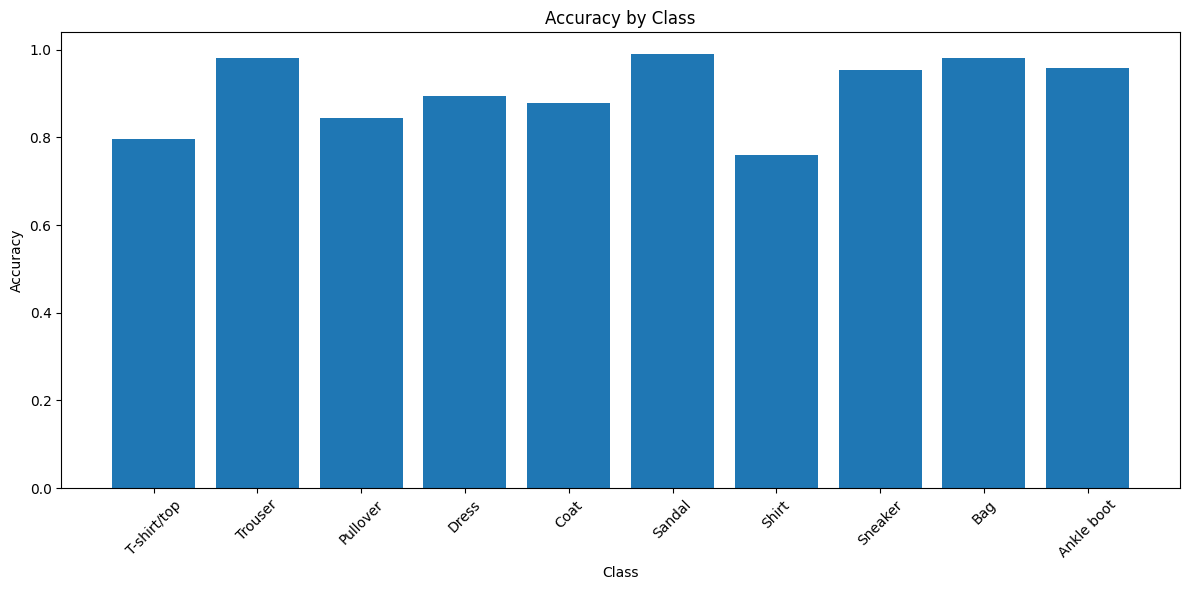


Per-class accuracy:
T-shirt/top: 0.796
Trouser: 0.981
Pullover: 0.845
Dress: 0.895
Coat: 0.878
Sandal: 0.990
Shirt: 0.759
Sneaker: 0.954
Bag: 0.981
Ankle boot: 0.959


In [23]:
# Calculate per-class accuracy
class_accuracy = {}
for i in range(len(class_names)):
    mask = y_test == i
    class_accuracy[class_names[i]] = accuracy_score(y_test[mask], y_pred[mask])

# Plot per-class accuracy
plt.figure(figsize=(12, 6))
accuracies = list(class_accuracy.values())
plt.bar(class_names, accuracies)
plt.title('Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print per-class accuracy
print("\nPer-class accuracy:")
for class_name, accuracy in class_accuracy.items():
    print(f"{class_name}: {accuracy:.3f}")